In [ ]:
'''
!samtools mpileup CLIP-2J3.bam > CLIP-2J3.pileup
!samtools mpileup CLIP-polyclonal.bam > CLIP-polyclonal.pileup

awk '$4 >= 50' CLIP-2J3.pileup > CLIP-2J3_depth50.pileup
awk '$4 >= 50' CLIP-2J3.pileup > CLIP-polyclonal_depth50.pileup

# 2J3
cutadapt -a AGATCGGAAGAGC -o SRR458759.cleaned.fastq.gz SRR458759.fastq.gz

!gsnap -D /Users/eunbi/bio1 -d mm39 -A sam --gunzip SRR458759.cleaned.fastq.gz | samtools view -bS - > 2J3.bam

#polyclonal
cutadapt -a AGATCGGAAGAGC -o SRR458760.cleaned.fastq.gz SRR458760.fastq.gz

!gsnap -D /Users/eunbi/bio1 -d mm39 -A sam --gunzip SRR458760.cleaned.fastq.gz | samtools view -bS - > polyclonal.bam

'''

In [22]:
!gsnap --version

GSNAP version 2024-05-20 called with args: gsnap.sse42 --version

GSNAP: Genomic Short Nucleotide Alignment Program
Part of GMAP package, version 2024-05-20
Build target: x86_64-apple-darwin13.4.0
Features: pthreads enabled, no alloca, zlib available, mmap available, littleendian, sigaction available, 64 bits available
Popcnt: mm_popcnt
Builtin functions:
SIMD functions compiled: SSE2 SSSE3 SSE4.1 SSE4.2
Sizes: off_t (8), size_t (8), unsigned int (4), long int (8), long long int (8)
Default gmap directory (compiled): /opt/anaconda3/share
Default gmap directory (environment): /opt/anaconda3/share
Thomas D. Wu, Genentech, Inc.
Contact: twu@gene.com



In [27]:
import os
os.chdir("/Users/eunbi/bio1")  # 원하는 디렉토리로 변경
!pwd

/Users/eunbi/bio1


In [30]:
!ls /Users/eunbi/bio1/

ls: /Users/eunbi/bio1/mm39: No such file or directory


In [31]:
!gmap_build -D /Users/eunbi/bio1 -d mm39 mm39.fa

-k flag not specified, so building main hash table with default 15-mers
--local flag not specified, so building localdb by default
Writing files under /Users/eunbi/bio1
Not sorting chromosomes.  To sort chromosomes other ways, use the -s flag.
Creating files in directory /Users/eunbi/bio1/mm39
Running "/opt/anaconda3/bin/fa_coords"        -o "/Users/eunbi/bio1/mm39.coords" -f "/Users/eunbi/bio1/mm39.sources"
Opening file mm39.fa
  Contig chr1: concatenated at chromosome end: chr1:1..195154279 (length = 195154279 nt)
  Contig chr10: concatenated at chromosome end: chr10:1..130530862 (length = 130530862 nt)
  Contig chr11: concatenated at chromosome end: chr11:1..121973369 (length = 121973369 nt)
  Contig chr12: concatenated at chromosome end: chr12:1..120092757 (length = 120092757 nt)
  Contig chr13: concatenated at chromosome end: chr13:1..120883175 (length = 120883175 nt)
  Contig chr14: concatenated at chromosome end: chr14:1..125139656 (length = 125139656 nt)
  Contig chr15: concate

In [34]:
!gsnap -D /Users/eunbi/bio1 -d mm39 -A sam --gunzip SRR458760.cleaned.fastq.gz | samtools view -bS - > 2J3.bam

GSNAP version 2024-05-20 called with args: gsnap.sse42 -D /Users/eunbi/bio1 -d mm39 -A sam --gunzip SRR458759.cleaned.fastq.gz
Neither novel splicing (-N) nor known splicing (-s) turned on => assume reads are DNA-Seq (genomic)
Checking compiler assumptions for SSE2: 000041A7 10D63AF1 xor=10D67B56
Checking compiler assumptions for SSE4.1: -89 -15 max=241 => compiler zero extends
Checking compiler assumptions for SSE4.2 options: 000041A7 _mm_popcnt_u32=7 
Finished checking compiler assumptions
Allocating memory for compressed genome (oligos)...done (1,023,083,432 bytes, 0.29 sec)
Allocating memory for compressed genome (bits)...done (1,023,083,472 bytes, 0.29 sec)
Looking for genome mm39 in directory /Users/eunbi/bio1/mm39
Looking for index files in directory /Users/eunbi/bio1/mm39
  Pointers file is mm39.ref153offsets64meta
  Offsets file is mm39.ref153offsets64strm
  Positions file is mm39.ref153positions
Offsets compression type: bitpack64
Allocating memory for ref offset pointers, km

In [38]:
!gsnap -D /Users/eunbi/bio1 -d mm39 -A sam --gunzip SRR458760.cleaned.fastq.gz | samtools view -bS - > polyclonal.bam

GSNAP version 2024-05-20 called with args: gsnap.sse42 -D /Users/eunbi/bio1 -d mm39 -A sam --gunzip SRR458760.cleaned.fastq.gz
Neither novel splicing (-N) nor known splicing (-s) turned on => assume reads are DNA-Seq (genomic)
Checking compiler assumptions for SSE2: 000041A7 10D63AF1 xor=10D67B56
Checking compiler assumptions for SSE4.1: -89 -15 max=241 => compiler zero extends
Checking compiler assumptions for SSE4.2 options: 000041A7 _mm_popcnt_u32=7 
Finished checking compiler assumptions
Allocating memory for compressed genome (oligos)...done (1,023,083,432 bytes, 0.29 sec)
Allocating memory for compressed genome (bits)...done (1,023,083,472 bytes, 0.31 sec)
Looking for genome mm39 in directory /Users/eunbi/bio1/mm39
Looking for index files in directory /Users/eunbi/bio1/mm39
  Pointers file is mm39.ref153offsets64meta
  Offsets file is mm39.ref153offsets64strm
  Positions file is mm39.ref153positions
Offsets compression type: bitpack64
Allocating memory for ref offset pointers, km

In [ ]:
!samtools sort -o CLIP-2J3.bam 2J3.bam
!samtools index CLIP-2J3.bam

In [40]:
!samtools sort -o CLIP-polyclonal.bam polyclonal.bam
!samtools index CLIP-polyclonal.bam

[bam_sort_core] merging from 11 files and 1 in-memory blocks...


In [25]:
import os
print(os.getcwd())

/Users/eunbi/bio1


In [33]:
import pandas as pd

pileup = pd.read_csv('/Users/eunbi/bio1/CLIP-35L33G_depth50.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
pileup.tail()

,chrom,pos,_ref,count,basereads,quals
25210334,MU069435.1,1564,N,305,>>>>TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,DIDHGHIIGIGIEDIGIHIIG?FBGG@E=:A7G8@HHIHIIDDBII...
25210335,MU069435.1,1565,N,297,>>>>AAAAAAAAAAAA$AA$AA$A$AA$AA$A$AAAAAAAAAAAAA...,DIDHBHHIIIGICGIGIEIHDEFBGE8C=1?1G88IHIHIIDGBHI...
25210336,MU069435.1,1566,N,289,>>>>CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,DIDHG>IIHIHHCEIIIEB5D@;=H5BIHIHHI<DAIIBDIIFIIH...
25210337,MU069435.1,1567,N,291,>>>>T$T$T$T$T$T$T$T$T$T$T$T$T$T$T$TTTTTTTTTT$T...,DIDHFHGIIIIIDDIII?B=G::B=G=DIHIHIID@BIIGGIIHIH...
25210338,MU069435.1,1568,N,88,>>>>T$T$T$T$T$T$T$T$T$T$TT$T$TT$T$T$T$T$T$T$T$...,DIDHAG4BDBHBEIGHIHHHIIHIDIIIIIHIGIHIIEIHIHDHIG...


In [34]:
import re
toremove = re.compile('[<>$*#^]')
pileup['matches'] = pileup['basereads'].apply(lambda x: toremove.sub('', x))

In [35]:
pileup[['chrom', 'pos', 'matches']]

,chrom,pos,matches
0,chr1,3222722,CCCAAAAAAAAAAAAAAAAAAAAAAAAA!A!A!A!A!A!A!A!A!A...
1,chr1,3222723,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...
2,chr1,3222724,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...
3,chr1,3222725,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGAGGAGGGGGG...
4,chr1,3222726,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...
...,...,...,...
25210334,MU069435.1,1564,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...
25210335,MU069435.1,1565,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...
25210336,MU069435.1,1566,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
25210337,MU069435.1,1567,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...


In [36]:
import pandas as pd
import numpy as np

def count_bases(seq: str):
    """Return base counts and total depth for a sequence of A/C/G/T calls."""
    counts = {
        'A': seq.count('A'),
        'C': seq.count('C'),
        'G': seq.count('G'),
        'T': seq.count('T')
    }
    total = sum(counts.values())
    return counts, total

# 2. 각 position별로 Shannon entropy를 계산
def shannon_entropy(counts: dict, total: int) -> float:
    if total == 0:
        return 0.0
    probs = np.array(list(counts.values()), dtype=float) / total
    probs = probs[probs > 0]  # avoid log2(0)
    return float(-np.sum(probs * np.log2(probs)))

# 3. 계산한 Shannon entropy를 bedgraph format으로 출력
records = []
for chrom, pos, matches in pileup[['chrom', 'pos', 'matches']].itertuples(index=False):
    counts, depth = count_bases(matches)
    entropy = shannon_entropy(counts, depth)
    start = int(pos) - 1   # bedgraph: 0‑based, half‑open interval
    end   = int(pos)       # end is 1‑based exclusive
    records.append((chrom, start, end, entropy))

entropy_df = pd.DataFrame(records, columns=['chrom', 'start', 'end', 'entropy'])

In [37]:
print(entropy_df.head())

  chrom    start      end   entropy
0  chr1  3222721  3222722  0.164379
1  chr1  3222722  3222723 -0.000000
2  chr1  3222723  3222724 -0.000000
3  chr1  3222724  3222725  0.203572
4  chr1  3222725  3222726  1.401164


In [38]:
# entropy filtering
high_entropy_df = entropy_df[entropy_df["entropy"] >= 0.8]

In [22]:
!pip install pyfaidx

In [39]:
# Reference genome에서 ±10bp 서열 추출
from pyfaidx import Fasta

ref = Fasta("/Users/eunbi/bio1/mm39.fa")  # 경로에 맞게 수정
motifs = []

for _, row in high_entropy_df.iterrows():
    chrom = row["chrom"]
    pos = int(row["start"])  # 중심 위치
    try:
        seq = ref[chrom][pos - 10:pos + 11].seq.upper()
        seq = seq.replace("U", "T")  # RNA가 아니라 DNA로
        if len(seq) == 21:
            motifs.append(seq)
    except:
        continue

In [41]:
df_fasta = pd.DataFrame({"seq": motifs})
print(df_fasta.head())

                     seq
0  AAATTTAGAGGCGTAGACAGT
1  GATGGAGCGCGGTGGCTGCCA
2  CCTAGACCTAGATTTAAAAGC
3  GATGATGGTAGAGGACATCAA
4  TACAGGAGAACACTGCTAAAG


<Figure size 600x400 with 0 Axes>

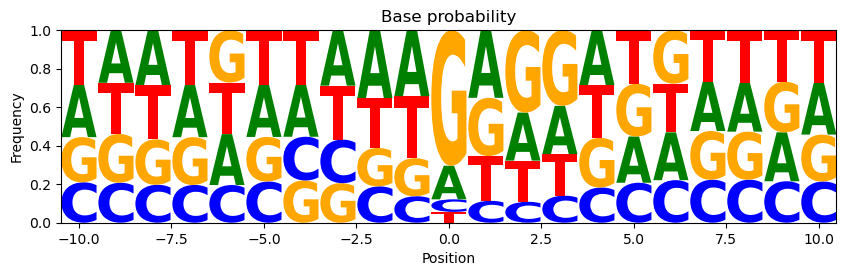

In [43]:
from collections import Counter
import logomaker
import matplotlib.pyplot as plt

seqs = df_fasta["seq"].tolist()
counts = [Counter(col) for col in zip(*seqs)]
df_freq = pd.DataFrame(counts).fillna(0)[["A", "C", "G", "T"]]
df_freq.index = range(-10, 11)

# Base probability
df_freq_norm = df_freq.div(df_freq.sum(axis=1), axis=0)
plt.figure(figsize=(6, 4))
logomaker.Logo(df_freq_norm)
plt.title("Base probability")
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.show()

<Figure size 600x400 with 0 Axes>

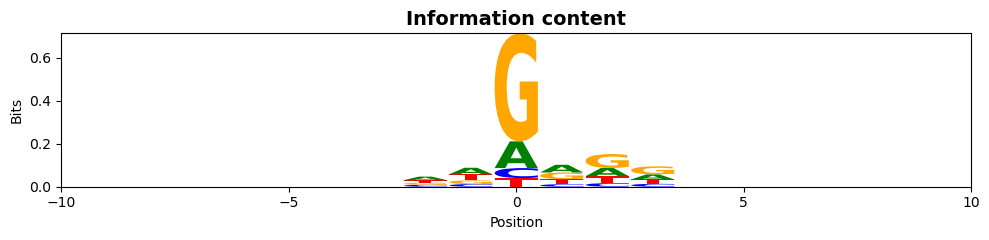

In [46]:
# Information content
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import logomaker

# seqs: 전체 motif 리스트 (21nt)
seqs = [s.replace("U", "T") for s in df_fasta["seq"]]  # RNA > DNA

# -2 ~ +3 위치만 잘라내기
hexamers = [s[8:14] for s in seqs if len(s) == 21]  # 중심이 인덱스 10 → -2 = 8, +3 = 13

# 빈도 행렬 만들기
counts = [Counter(col) for col in zip(*hexamers)]
df_freq = pd.DataFrame(counts).fillna(0)[["A", "C", "G", "T"]]
df_freq.index = range(-2, 4)

# 정보량 계산
df_bits = logomaker.transform_matrix(df_freq, from_type='counts', to_type='information')

# 그래프
plt.figure(figsize=(6, 4))
logomaker.Logo(df_bits)
plt.title("Information content", fontsize=14, weight='bold')
plt.xlabel("Position")
plt.ylabel("Bits")
plt.xticks(range(-10, 11, 5))
plt.xlim(-10, 10)
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

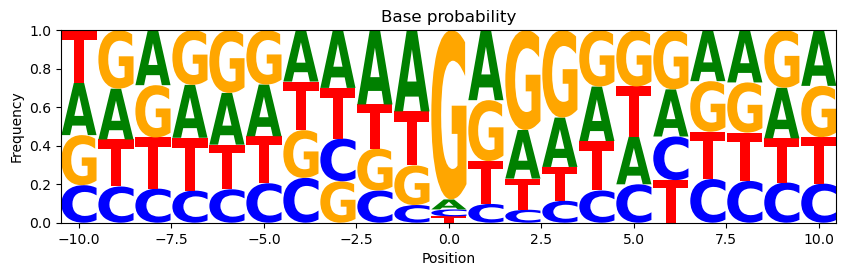

In [36]:
import pandas as pd
import re
import numpy as np
from pyfaidx import Fasta
from collections import Counter
import logomaker
import matplotlib.pyplot as plt

pileup = pd.read_csv('/Users/eunbi/bio1/CLIP-2J3_depth50.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])

toremove = re.compile('[<>$*#^]')
pileup['matches'] = pileup['basereads'].apply(lambda x: toremove.sub('', x))


def count_bases(seq: str):
    """Return base counts and total depth for a sequence of A/C/G/T calls."""
    counts = {
        'A': seq.count('A'),
        'C': seq.count('C'),
        'G': seq.count('G'),
        'T': seq.count('T')
    }
    total = sum(counts.values())
    return counts, total

# 2. 각 position별로 Shannon entropy를 계산
def shannon_entropy(counts: dict, total: int) -> float:
    if total == 0:
        return 0.0
    probs = np.array(list(counts.values()), dtype=float) / total
    probs = probs[probs > 0]  # avoid log2(0)
    return float(-np.sum(probs * np.log2(probs)))

# 3. 계산한 Shannon entropy를 bedgraph format으로 출력
records = []
for chrom, pos, matches in pileup[['chrom', 'pos', 'matches']].itertuples(index=False):
    counts, depth = count_bases(matches)
    entropy = shannon_entropy(counts, depth)
    start = int(pos) - 1   # bedgraph: 0‑based, half‑open interval
    end   = int(pos)       # end is 1‑based exclusive
    records.append((chrom, start, end, entropy))

entropy_df = pd.DataFrame(records, columns=['chrom', 'start', 'end', 'entropy'])

high_entropy_df = entropy_df[entropy_df["entropy"] >= 0.8]

# Reference genome에서 ±10bp 서열 추출
ref = Fasta("/Users/eunbi/bio1/mm39.fa")  # 경로에 맞게 수정
motifs = []

for _, row in high_entropy_df.iterrows():
    chrom = row["chrom"]
    pos = int(row["start"])  # 중심 위치
    try:
        seq = ref[chrom][pos - 10:pos + 11].seq.upper()
        seq = seq.replace("U", "T")  # RNA가 아니라 DNA로
        if len(seq) == 21:
            motifs.append(seq)
    except:
        continue

df_fasta = pd.DataFrame({"seq": motifs})

seqs = df_fasta["seq"].tolist()
counts = [Counter(col) for col in zip(*seqs)]
df_freq = pd.DataFrame(counts).fillna(0)[["A", "C", "G", "T"]]
df_freq.index = range(-10, 11)

# Base probability
df_freq_norm = df_freq.div(df_freq.sum(axis=1), axis=0)
plt.figure(figsize=(6, 4))
logomaker.Logo(df_freq_norm)
plt.title("Base probability")
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.show()

<Figure size 600x400 with 0 Axes>

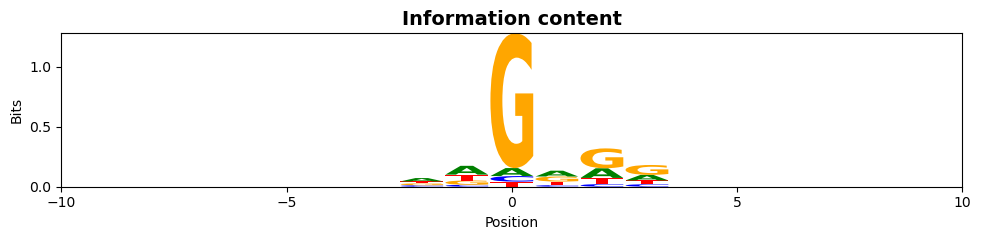

In [37]:
# Information content
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import logomaker

# seqs: 전체 motif 리스트 (21nt)
seqs = [s.replace("U", "T") for s in df_fasta["seq"]]  # RNA > DNA

# -2 ~ +3 위치만 잘라내기
hexamers = [s[8:14] for s in seqs if len(s) == 21]  # 중심이 인덱스 10 → -2 = 8, +3 = 13

# 빈도 행렬 만들기
counts = [Counter(col) for col in zip(*hexamers)]
df_freq = pd.DataFrame(counts).fillna(0)[["A", "C", "G", "T"]]
df_freq.index = range(-2, 4)

# 정보량 계산
df_bits = logomaker.transform_matrix(df_freq, from_type='counts', to_type='information')

# 그래프
plt.figure(figsize=(6, 4))
logomaker.Logo(df_bits)
plt.title("Information content", fontsize=14, weight='bold')
plt.xlabel("Position")
plt.ylabel("Bits")
plt.xticks(range(-10, 11, 5))
plt.xlim(-10, 10)
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

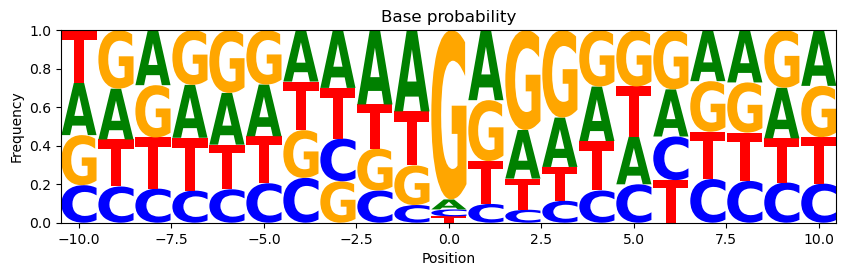

In [41]:
import pandas as pd
import re
import numpy as np
from pyfaidx import Fasta
from collections import Counter
import logomaker
import matplotlib.pyplot as plt

pileup = pd.read_csv('/Users/eunbi/bio1/CLIP-polyclonal_depth50.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])

toremove = re.compile('[<>$*#^]')
pileup['matches'] = pileup['basereads'].apply(lambda x: toremove.sub('', x))


def count_bases(seq: str):
    """Return base counts and total depth for a sequence of A/C/G/T calls."""
    counts = {
        'A': seq.count('A'),
        'C': seq.count('C'),
        'G': seq.count('G'),
        'T': seq.count('T')
    }
    total = sum(counts.values())
    return counts, total

# 2. 각 position별로 Shannon entropy를 계산
def shannon_entropy(counts: dict, total: int) -> float:
    if total == 0:
        return 0.0
    probs = np.array(list(counts.values()), dtype=float) / total
    probs = probs[probs > 0]  # avoid log2(0)
    return float(-np.sum(probs * np.log2(probs)))

# 3. 계산한 Shannon entropy를 bedgraph format으로 출력
records = []
for chrom, pos, matches in pileup[['chrom', 'pos', 'matches']].itertuples(index=False):
    counts, depth = count_bases(matches)
    entropy = shannon_entropy(counts, depth)
    start = int(pos) - 1   # bedgraph: 0‑based, half‑open interval
    end   = int(pos)       # end is 1‑based exclusive
    records.append((chrom, start, end, entropy))

entropy_df = pd.DataFrame(records, columns=['chrom', 'start', 'end', 'entropy'])

high_entropy_df = entropy_df[entropy_df["entropy"] >= 0.8]

# Reference genome에서 ±10bp 서열 추출
ref = Fasta("/Users/eunbi/bio1/mm39.fa")  # 경로에 맞게 수정
motifs = []

for _, row in high_entropy_df.iterrows():
    chrom = row["chrom"]
    pos = int(row["start"])  # 중심 위치
    try:
        seq = ref[chrom][pos - 10:pos + 11].seq.upper()
        seq = seq.replace("U", "T")  # RNA가 아니라 DNA로
        if len(seq) == 21:
            motifs.append(seq)
    except:
        continue

df_fasta = pd.DataFrame({"seq": motifs})

seqs = df_fasta["seq"].tolist()
counts = [Counter(col) for col in zip(*seqs)]
df_freq = pd.DataFrame(counts).fillna(0)[["A", "C", "G", "T"]]
df_freq.index = range(-10, 11)

# Base probability
df_freq_norm = df_freq.div(df_freq.sum(axis=1), axis=0)
plt.figure(figsize=(6, 4))
logomaker.Logo(df_freq_norm)
plt.title("Base probability")
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.show()

<Figure size 600x400 with 0 Axes>

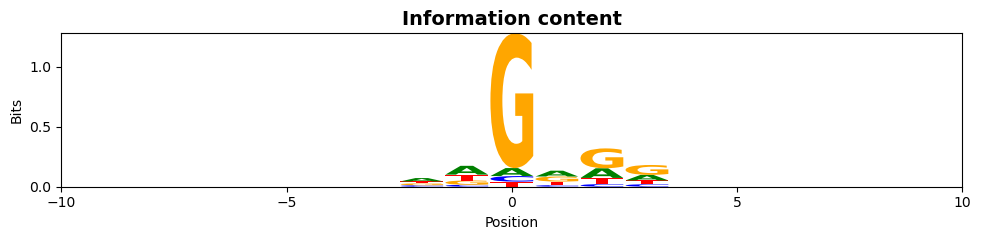

In [42]:
# Information content
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import logomaker

# seqs: 전체 motif 리스트 (21nt)
seqs = [s.replace("U", "T") for s in df_fasta["seq"]]  # RNA > DNA

# -2 ~ +3 위치만 잘라내기
hexamers = [s[8:14] for s in seqs if len(s) == 21]  # 중심이 인덱스 10 → -2 = 8, +3 = 13

# 빈도 행렬 만들기
counts = [Counter(col) for col in zip(*hexamers)]
df_freq = pd.DataFrame(counts).fillna(0)[["A", "C", "G", "T"]]
df_freq.index = range(-2, 4)

# 정보량 계산
df_bits = logomaker.transform_matrix(df_freq, from_type='counts', to_type='information')

# 그래프
plt.figure(figsize=(6, 4))
logomaker.Logo(df_bits)
plt.title("Information content", fontsize=14, weight='bold')
plt.xlabel("Position")
plt.ylabel("Bits")
plt.xticks(range(-10, 11, 5))
plt.xlim(-10, 10)
plt.tight_layout()
plt.show()